# Pro tip: if you run the import once you get a lot of warning, but then you just run it again then the warning is gone

importing Jupyter notebook from herMLE.ipynb
importing Jupyter notebook from Data_processing.ipynb


/home/AD/hop006/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:3969: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


importing Jupyter notebook from Import EEG.ipynb


/home/AD/hop006/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


(4, 1371900)
9.771552


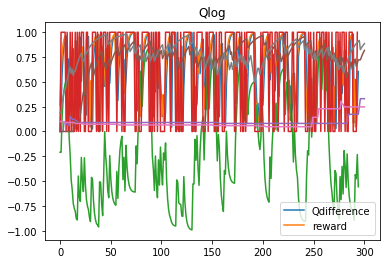

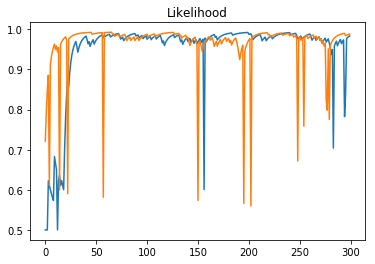

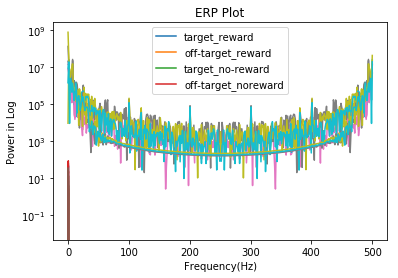

In [1]:
import impnb
import herMLE
import Data_processing as dp;
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Import_EEG as IE;
from scipy import stats

img_path='/cndd/hop006/Processing/PRL_imgs'
behavior_log_path='/cndd/hop006/Github/RewardReversalPorject/BehaviorLog/'
plt_path='/cndd/hop006/Github/RewardReversalPorject/Plots/'
ERP_plot_path='/cndd/hop006/Github/RewardReversalPorject/Plots/ERP/'
PELogs=pd.read_pickle(behavior_log_path+'rat26to38PElog.pkl')

# Part Zero: Gathering Data - every rat takes about 20s to process
#### Note: Only doing from rat_26 and up, some are not 20 days apart
#### Common electrodes: 
 Ag Disk (frontal center)',
 'L Au1 EEG',
 'L Cerebellum EEG',
 'L NAc LFP',
 'L lOFC LFP',
 'R ACC LFP',
 'R Au1 LFP',
 'R Caudate LFP',
 'R lOFC EEG'}

In [2]:
rat_2_anal=sorted(list(set(dp.day1['subject'])))[1:] # droped 25 cuz it only had one recording
del rat_2_anal[6] # also dropping the seventh one cuz there's a bug where there's one less reward
days=2
behavior_log={}

In [3]:
rat_2_anal=[26, 28, 29, 30, 31, 33, 35, 36, 37]

# DON'T RUN THIS CELL $\Downarrow$

In [53]:
for myrat in rat_2_anal:
    val_chan,chan_name,dates,rat_nums,reward_tone=IE.get_excel_info(myrat)
    rat_rlogs=[]
    rat_alogs=[]
    for day in range(days):
        rat_df=IE.get_ephys(dates[day],rat_nums[day])
#          tvec,signal,low_tone,high_tone,tar,off_tar=IE.rat_summary(rat_df)
        action_log,reward_log,epoched_eeg=IE.get_behavior(rat_df,300,reward_tone,plot=False)
        rat_rlogs.append(reward_log)
        rat_alogs.append(action_log)
        print(myrat,day)
    behavior_log[myrat]={}
    behavior_log[myrat]['reward']=rat_rlogs
    behavior_log[myrat]['action']=rat_alogs

/home/AD/hop006/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


(4, 1371900)
26 0
(4, 1408110)
26 1
(4, 1458630)
28 0
(4, 1395660)
28 1


Import EEG.ipynb:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  "import Data_processing as dp\n",


(4, 1453980)
29 0
(4, 1577820)
29 1
(4, 1343550)
30 0
(4, 1577820)
30 1
(4, 1867320)
31 0
(4, 1419330)
31 1
(4, 1418730)
33 0
(4, 1574130)
33 1
(4, 1622910)
35 0
(4, 1496370)
35 1
(4, 1490610)
36 0
(4, 1496370)
36 1
(4, 1507680)
37 0
(4, 1538760)
37 1


In [4]:
behavior_df=pd.read_pickle(behavior_log_path+'new_rat26to38.pkl')

In [54]:
behavior_df=pd.DataFrame(behavior_log)
behavior_df.to_pickle(behavior_log_path+'new_rat26to38.pkl')

# Part One: Behavior Models
### Model-1: Q-learning with alpha_gain and loss, beta, and sigmoid action decision

### Plots

/home/AD/hop006/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


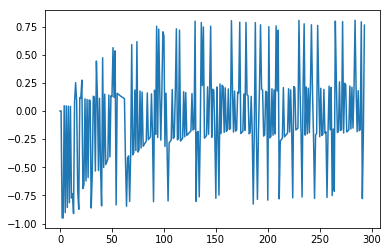

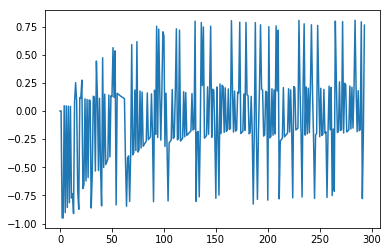

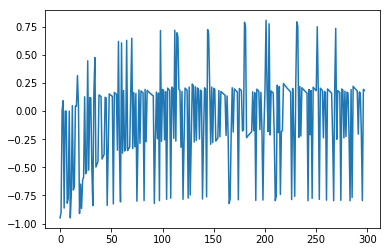

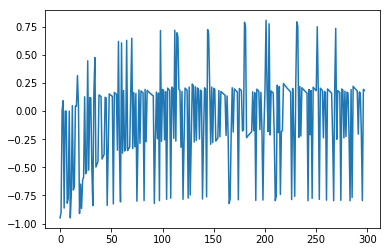

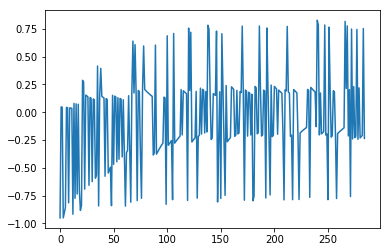

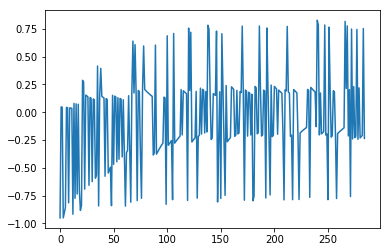

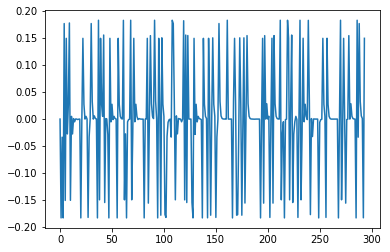

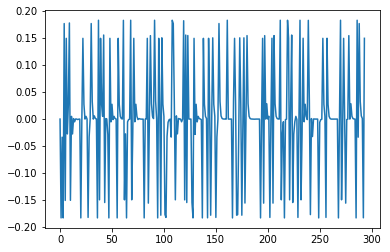

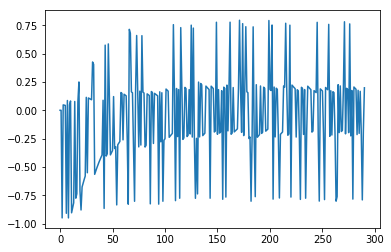

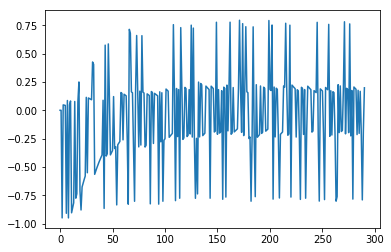

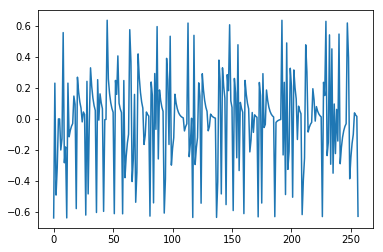

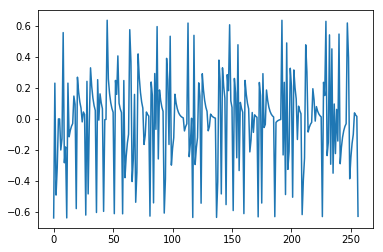

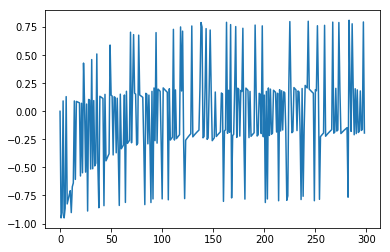

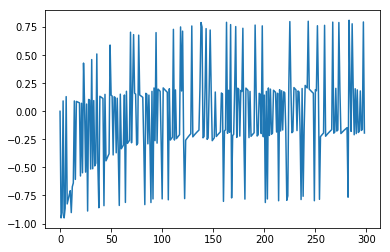

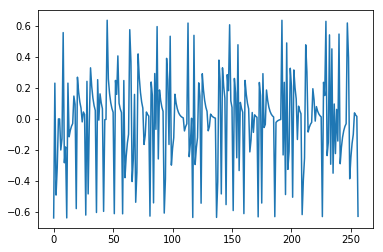

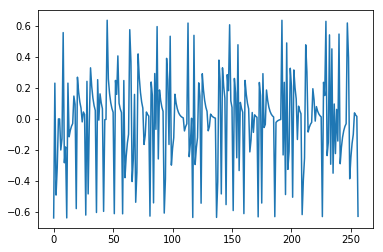

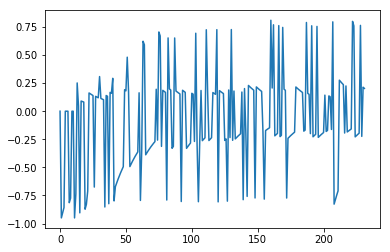

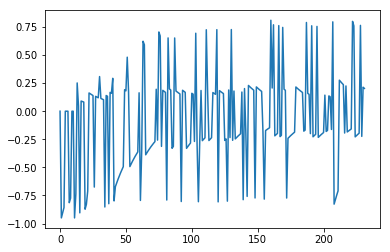

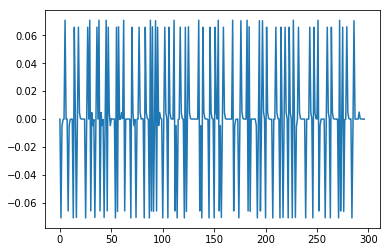

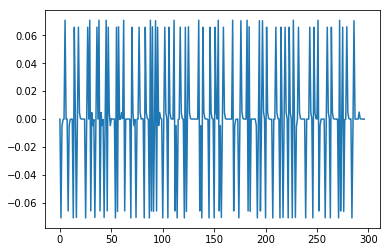

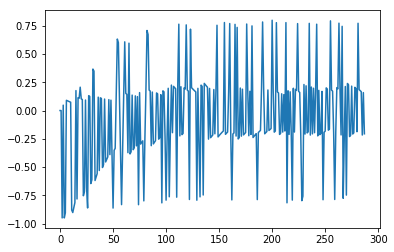

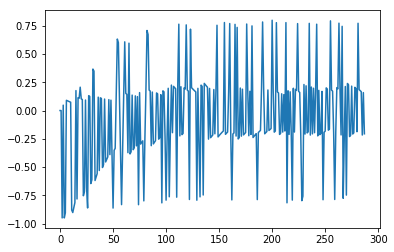

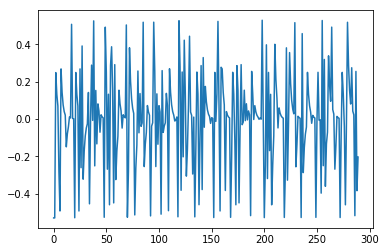

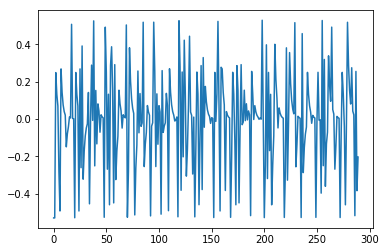

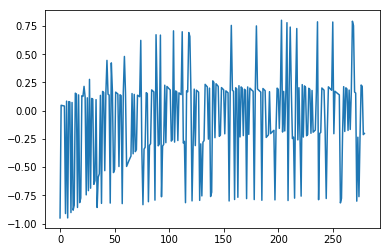

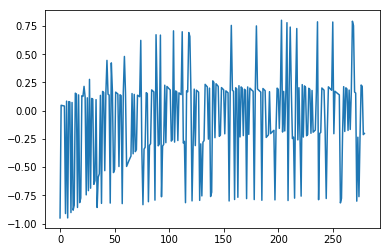

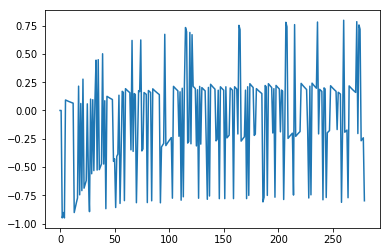

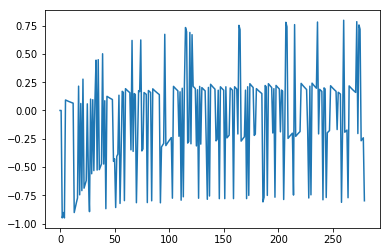

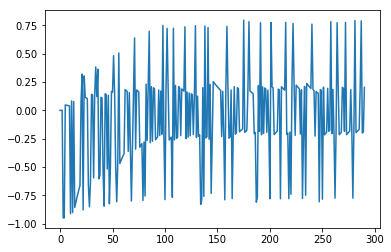

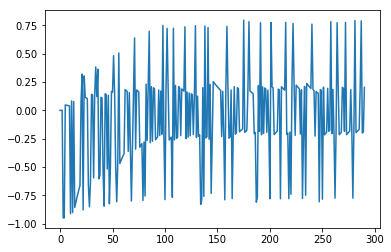

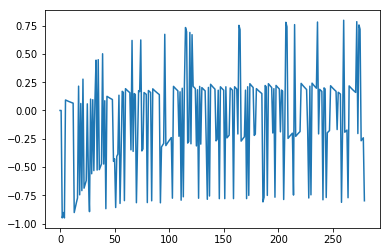

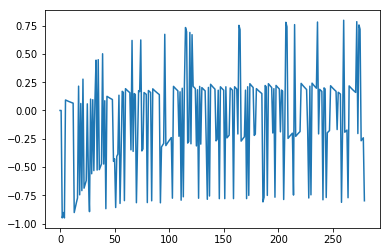

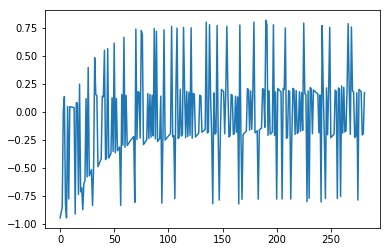

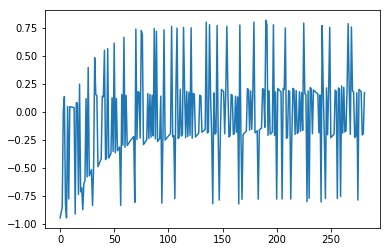

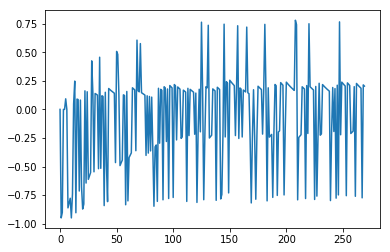

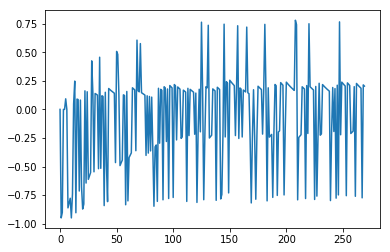

In [5]:
count=1
n=len(rat_2_anal)
for i in range(n*2):
    for day in range(days):
        plt.figure(count)
        count+=1
#         print(PELogs.iloc[rat][day])
        plt.plot(PELogs.iloc[i][0])


# Part two: import EEG

## Generating Label Plots

26


/home/AD/hop006/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


(4, 1371900)
(4, 1408110)
28
(4, 1458630)


IndexError: index 286 is out of bounds for axis 0 with size 285

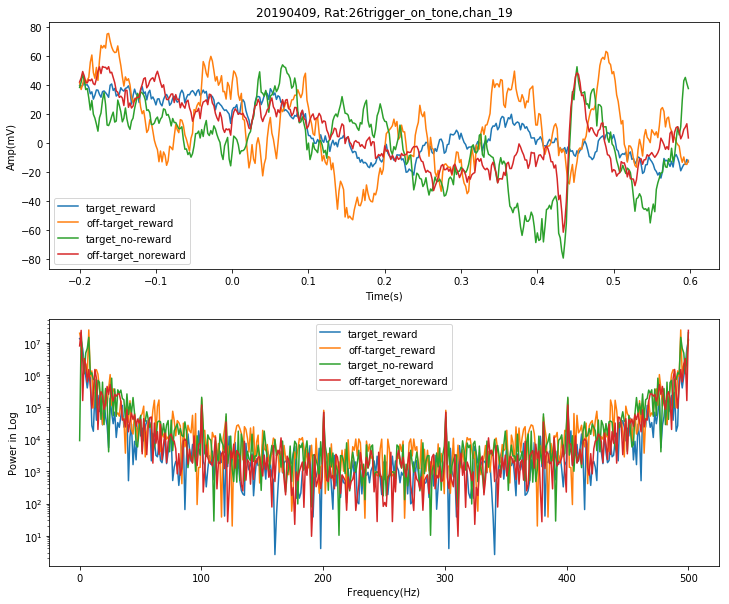

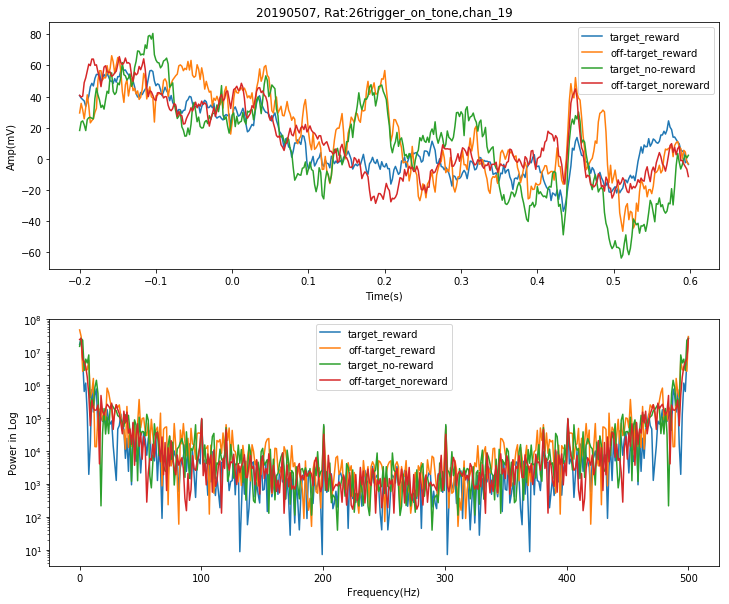

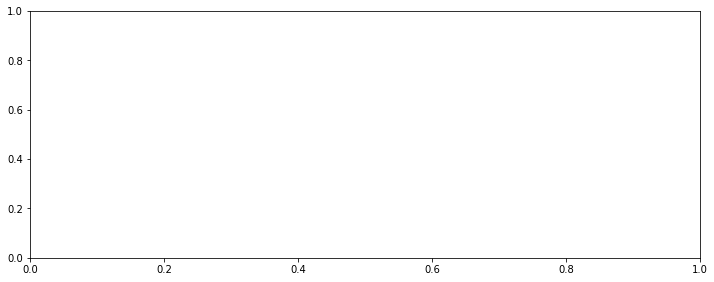

In [4]:
indx=np.array([])
count=1
for rat in rat_2_anal:
    print(rat)
    val_chan,chan_name,dates,rat_nums,reward_tone=IE.get_excel_info(rat)
    for day in range(days):
        plt.figure(count,figsize=(12,10))
        count+=1
        plt.subplot(2,1,1)
        rat_df=IE.get_ephys(dates[day],rat_nums[day])
        action_log,reward_log,epoched_eeg=IE.get_behavior(rat_df,300,reward_tone,plot=False);
        tar_r=IE.eeg_by_label(epoched_eeg,19,action_log,reward_log,1,1) # default channel 19
        off_r=IE.eeg_by_label(epoched_eeg,19,action_log,reward_log,2,1)
        tar_n=IE.eeg_by_label(epoched_eeg,19,action_log,reward_log,1,0)
        off_n=IE.eeg_by_label(epoched_eeg,19,action_log,reward_log,2,0)
        erp1=IE.plot_average(tar_r,fil=False) # specify filter range here
        erp2=IE.plot_average(off_r,fil=False)
        erp3=IE.plot_average(tar_n,fil=False)
        erp4=IE.plot_average(off_n,fil=False)
        plt.title(str(dates[day])+', Rat:'+str(rat_nums[day])+'trigger_on_tone,chan_19')
        plt.legend(('target_reward','off-target_reward','target_no-reward','off-target_noreward'))
        plt.subplot(2,1,2)
        IE.spec_plot(erp1)
        IE.spec_plot(erp2)
        IE.spec_plot(erp3)
        IE.spec_plot(erp4)
        plt.legend(('target_reward','off-target_reward','target_no-reward','off-target_noreward'))
        plt.savefig(ERP_plot_path+str(rat_nums[day])+str(dates[day])+'_nofill_EEGplots.png', bbox_inches='tight')

# Correlation with PE
## Correlating the PE vector with every point on the epoch

In [26]:
indx=np.array([])
count=1
n=0
chan=19
cor=[]
for rat in rat_2_anal:
    print(rat)
    val_chan,chan_name,dates,rat_nums,reward_tone=IE.get_excel_info(rat)
    for day in range(days):
#         plt.plot(PELogs.iloc[n][0])
        myPE=PELogs.iloc[n][0]
        n+=1
#         plt.figure(count,figsize=(12,10))
#         count+=1
#         plt.subplot(2,1,1)
        rat_df=IE.get_ephys(dates[day],rat_nums[day])
        action_log,reward_log,epoched_eeg=IE.get_behavior(rat_df,300,reward_tone,plot=False);
        Tone=np.array(epoched_eeg['RE_epoch'])[:,19,:]
        for i in range(400):
            cor.append(stats.pearsonr(Tone[:,i],myPE.squeeze()))
        
        
#         erp1=IE.plot_average(tar_r,fil=False) # specify filter range here
#         erp2=IE.plot_average(off_r,fil=False)
#         erp3=IE.plot_average(tar_n,fil=False)
#         erp4=IE.plot_average(off_n,fil=False)
#         plt.title(str(dates[day])+', Rat:'+str(rat_nums[day])+'trigger_on_tone,chan_19')
#         plt.legend(('target_reward','off-target_reward','target_no-reward','off-target_noreward'))
#         plt.subplot(2,1,2)
#         IE.spec_plot(erp1)
#         IE.spec_plot(erp2)
#         IE.spec_plot(erp3)
#         IE.spec_plot(erp4)
#         plt.legend(('target_reward','off-target_reward','target_no-reward','off-target_noreward'))
#         plt.savefig(ERP_plot_path+str(rat_nums[day])+str(dates[day])+'_nofill_EEGplots.png', bbox_inches='tight')

26
(4, 1371900)
(4, 1408110)
28
(4, 1458630)
(4, 1395660)
29
(4, 1453980)
(4, 1577820)
30
(4, 1343550)
(4, 1577820)
31
(4, 1867320)
(4, 1419330)
33
(4, 1418730)
(4, 1574130)
35
(4, 1622910)
(4, 1496370)
36
(4, 1490610)
(4, 1496370)
37
(4, 1507680)
(4, 1538760)


In [12]:
np.array(cor).shape

(7200, 2)

# For each rat

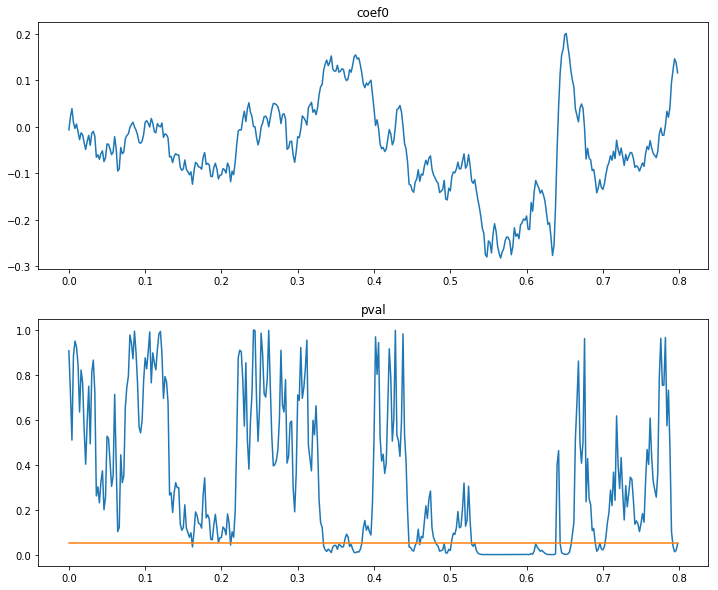

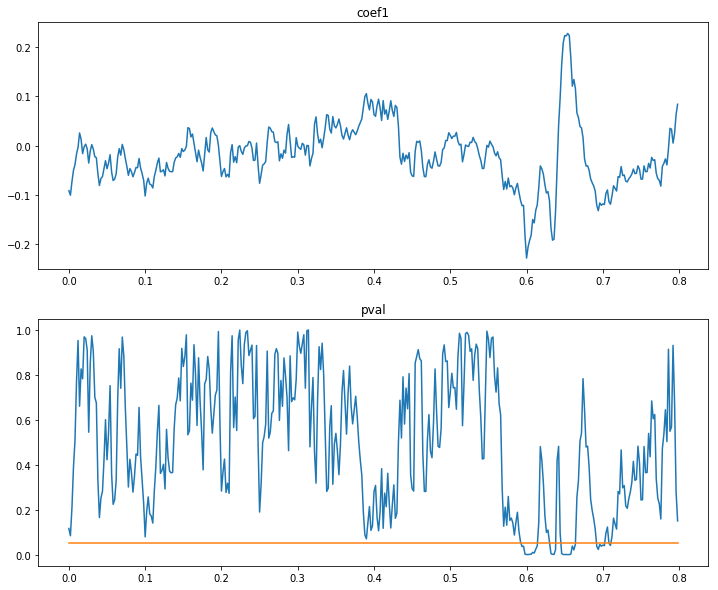

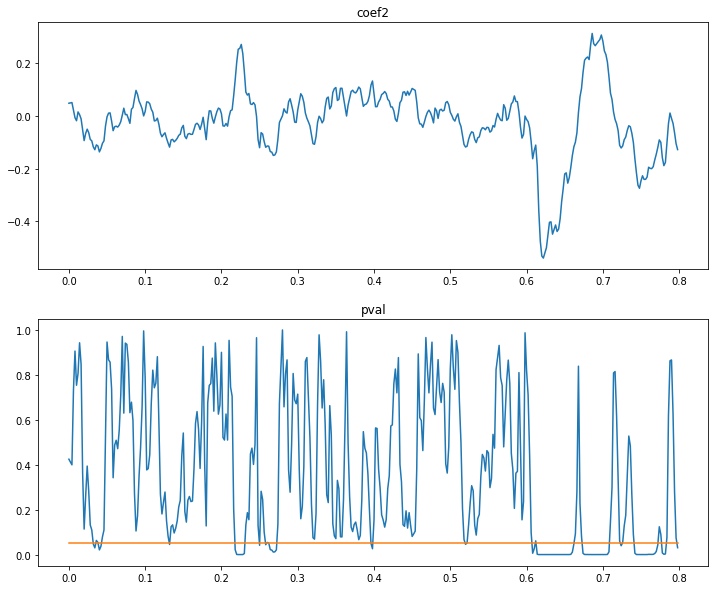

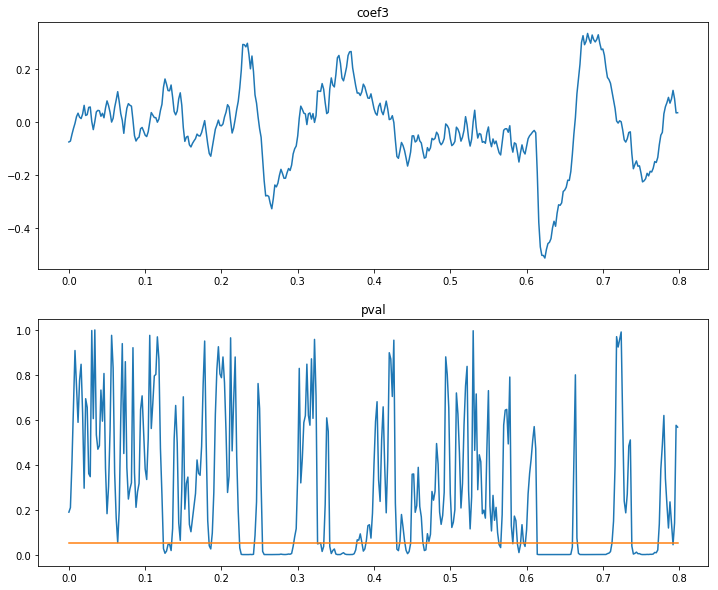

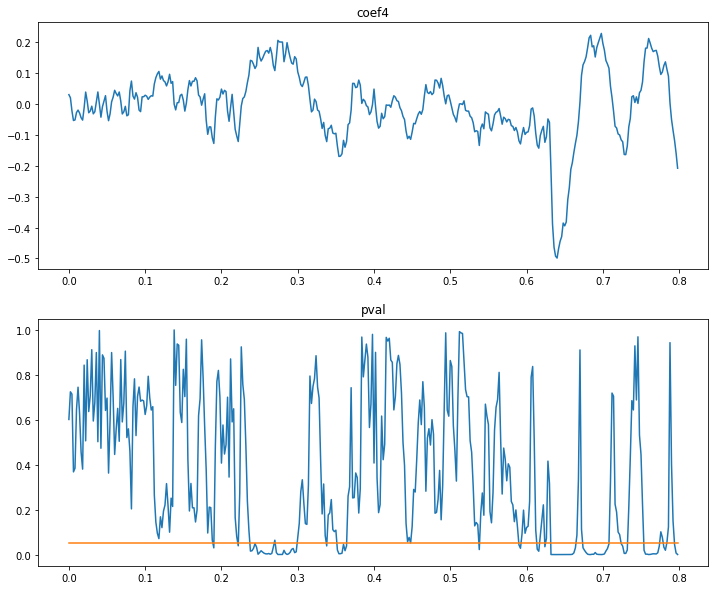

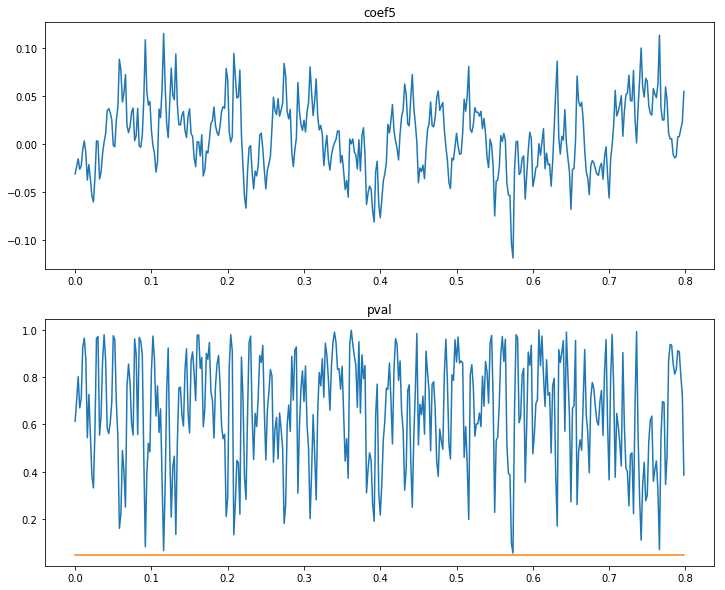

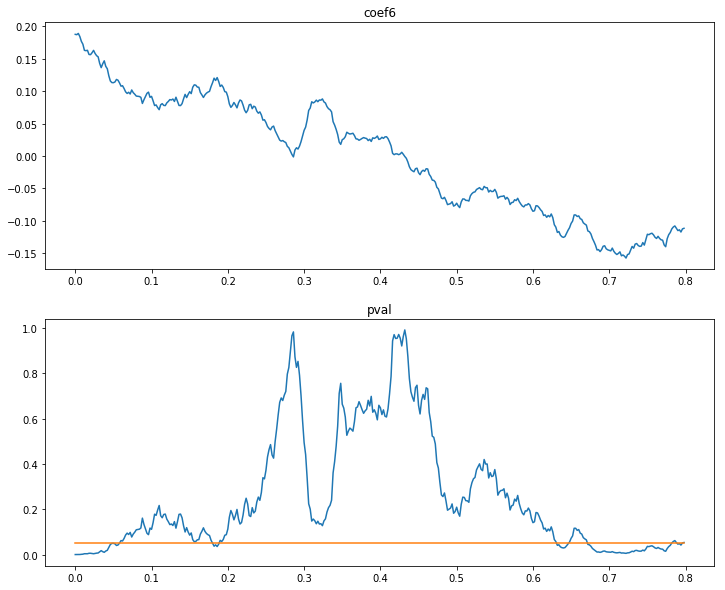

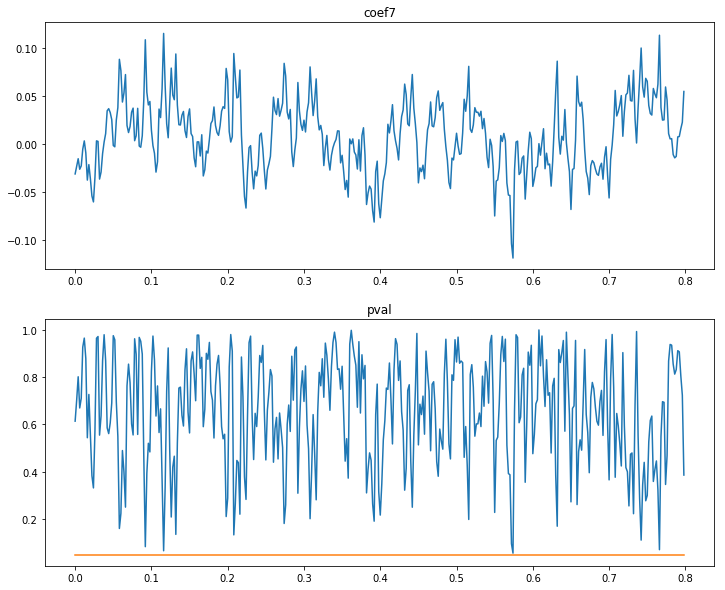

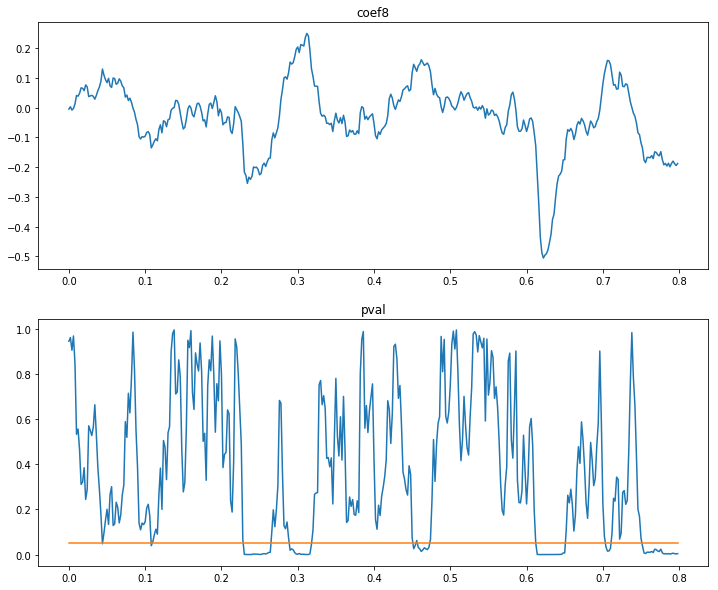

In [29]:
count=1
n=len(rat_2_anal)
cor=np.array(cor)
fs=500.0
dt=1/fs
tvec=np.arange(0,dt*400,dt)
for i in range(n):
    coef=cor[i*400:i*400+400,0]
    pval=cor[i*400:i*400+400,1]
    plt.figure(count,figsize=(12,10))
    count+=1
    plt.subplot(2,1,1)
    plt.plot(tvec,coef)
    plt.title('coef'+str(i))
    plt.subplot(2,1,2)
    plt.plot(tvec,pval)
    plt.plot(tvec,np.full(400,.05))
    plt.title('pval')

# Thresholding on some PE